In [27]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Load the dataset
df = sns.load_dataset('tips') # Load the tips dataset from seaborn library
df.head()  # Display the first 5 rows of the dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

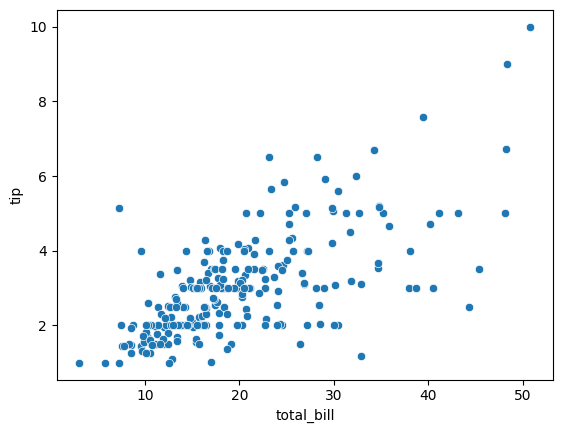

In [29]:
sns.scatterplot(x='total_bill',y='tip',data=df) # Plot the scatter plot of total bill and tip in the dataset using seaborn library

In [30]:
# Preprcessing the data
scaler = MinMaxScaler() # Create an instance of MinMaxScaler from sklearn.preprocessing library
df[['total_bill', 'tip']]= scaler.fit_transform(df[['total_bill', 'tip']]) # Fit and transform the data in the dataframe using MinMaxScaler instance

<Axes: xlabel='total_bill', ylabel='tip'>

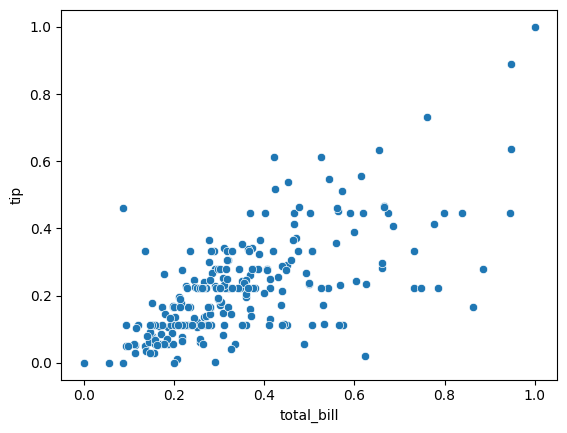

In [31]:
sns.scatterplot(x='total_bill',y='tip',data=df) # Plot the scatter plot of total bill and tip in the dataset after preprocessing the data using seaborn library

In [32]:
# Split the data in X and y
X = df[['total_bill']]
y = df['tip']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing sets with 20% of the data for testing and 80% for training
# X_test,X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42) # Split the data into training and testing sets with 30% of the data for testing and 70% for training (with a fixed seed so that results are reproducible)

In [34]:
# Call Model
model = LinearRegression() # Create an instance of LinearRegression from sklearn.linear_model library

In [35]:
model.fit(X_train, y_train) # Fit the model on the training data

LinearRegression()

In [36]:
print(model.intercept_) # Display the intercept term of the model
print(model.coef_) # Display the coefficient term of the model
print('y = ', model.intercept_, '+', model.coef_, '* X') # Display the equation of the model in the form of y = mx + c where m is the coefficient and c is the intercept term of the model

0.018891153924883414
[0.58987208]
y =  0.018891153924883414 + [0.58987208] * X


In [37]:
y_pred = model.predict(X_test) # Make predictions on the testing data using the model trained on the training data

In [38]:
# evaluate the modle 
print('MSE = ', mean_squared_error(y_test,y_pred)) # Print the mean squared error of the model using mean_squared_error function from sklearn.metrics library
print('R2 = ', r2_score(y_test,y_pred)) # Print the R2 score of the model using r2_score function from sklearn.metrics library
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred))) # Print the root mean squared error of the model using np.sqrt function from numpy library

MSE =  0.013661689437673158
R2 =  0.32679741145558316
RMSE =  0.1168832299248834


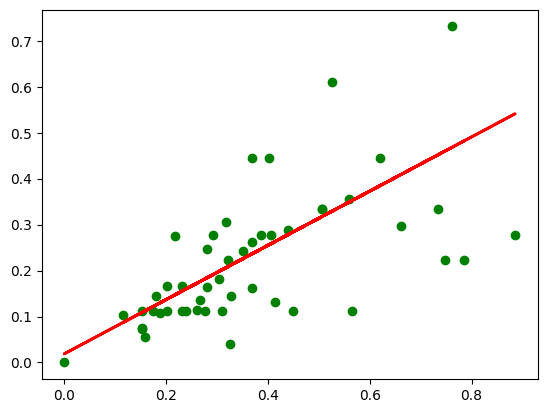

In [39]:
# Evaluate the model
plt.scatter(X_test, y_test, color= 'green') # Plot the scatter plot of the testing data using the model trained on the training data
plt.plot(X_test, y_pred, color= 'red', linewidth = 2) # Plot the predicted values of the testing data using the model trained on the training data

In [41]:
print('Predicted Tip: ', model.predict([[20]])) # Predict the tip amount for a bill amount of 20 in the testing data using the model trained on the training data


Predicted Tip:  [11.81633268]


c:\Users\Bilal\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
